In [3]:
import numpy as np
import pandas as pd

In [4]:
column_names=['used_id','item_id','rating','timestamp']
df=pd.read_csv('u.data',sep='\t',names=column_names)

In [5]:
df.head()

,used_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [6]:
movie_titles=pd.read_csv("Movie_Id_Titles")
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [7]:
df=pd.merge(df,movie_titles,on='item_id')
df.head()

,used_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

In [9]:
df.groupby('title')['rating'].mean().sort_values().head()

title
Quartier Mozart (1992)                        1.0
Amityville 1992: It's About Time (1992)       1.0
Tigrero: A Film That Was Never Made (1994)    1.0
Lashou shentan (1992)                         1.0
Mondo (1996)                                  1.0
Name: rating, dtype: float64

In [10]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             302
Contact (1997)               279
Fargo (1996)                 268
Scream (1996)                266
Return of the Jedi (1983)    259
Name: rating, dtype: int64

In [11]:
ratings=pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.500000
101 Dalmatians (1996),2.925926
12 Angry Men (1957),4.333333
187 (1997),2.900000


In [12]:
ratings['num of ratings']=pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head()

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,6
1-900 (1994),2.500000,2
101 Dalmatians (1996),2.925926,54
12 Angry Men (1957),4.333333,66
187 (1997),2.900000,20


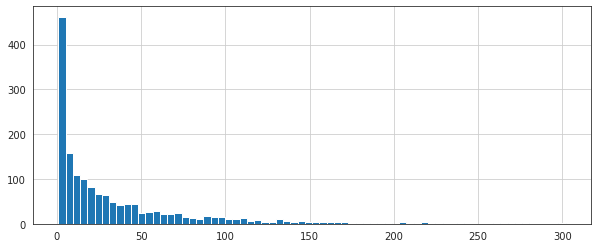

In [13]:
plt.figure(figsize=(10,4))
ratings['num of ratings'].hist(bins=70)

In [14]:
ratings['num of ratings']

title
'Til There Was You (1997)                 6
1-900 (1994)                              2
101 Dalmatians (1996)                    54
12 Angry Men (1957)                      66
187 (1997)                               20
                                         ..
Young Guns (1988)                        47
Young Guns II (1990)                     23
Young Poisoner's Handbook, The (1995)    19
Zeus and Roxanne (1997)                   3
unknown                                   7
Name: num of ratings, Length: 1588, dtype: int64

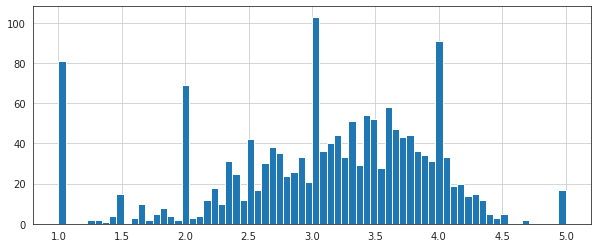

In [15]:
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=70)

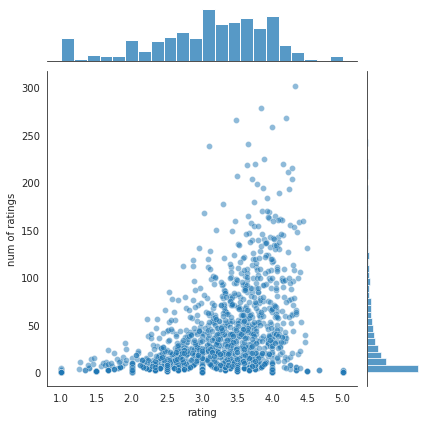

In [16]:
sns.jointplot(x='rating',y='num of ratings',data=ratings,alpha=0.5)

In [21]:
moviemat = df.pivot_table(columns='title',values='rating')
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",8 1/2 (1963),8 Seconds (1994),A Chef in Love (1996),Above the Rim (1994),Absolute Power (1997),"Abyss, The (1989)",Ace Ventura: Pet Detective (1994),Ace Ventura: When Nature Calls (1995),Across the Sea of Time (1995),Addams Family Values (1993),Addicted to Love (1997),"Addiction, The (1995)","Adventures of Pinocchio, The (1996)","Adventures of Priscilla, Queen of the Desert, The (1994)","Adventures of Robin Hood, The (1938)","Affair to Remember, An (1957)","African Queen, The (1951)",Afterglow (1997),"Age of Innocence, The (1993)",Aiqing wansui (1994),Air Bud (1997),Air Force One (1997),"Air Up There, The (1994)",Airheads (1994),Akira (1988),Aladdin (1992),Aladdin and the King of Thieves (1996),Alaska (1996),Albino Alligator (1996),Alice in Wonderland (1951),...,While You Were Sleeping (1995),"White Balloon, The (1995)",White Man's Burden (1995),White Squall (1996),"Whole Wide World, The (1996)",Widows' Peak (1994),Wild America (1997),Wild Bill (1995),"Wild Bunch, The (1969)",Wild Reeds (1994),Wild Things (1998),William Shakespeare's Romeo and Juliet (1996),Willy Wonka and the Chocolate Factory (1971),Window to Paris (1994),Wings of Courage (1995),Wings of Desire (1987),"Wings of the Dove, The (1997)",Winnie the Pooh and the Blustery Day (1968),"Winter Guest, The (1997)",Wishmaster (1997),With Honors (1994),Withnail and I (1987),Witness (1985),"Wizard of Oz, The (1939)",Wolf (1994),"Women, The (1939)","Wonderful, Horrible Life of Leni Riefenstahl, The (1993)",Wonderland (1997),"Wooden Man's Bride, The (Wu Kui) (1994)","World of Apu, The (Apur Sansar) (1959)","Wrong Trousers, The (1993)",Wyatt Earp (1994),Yankee Zulu (1994),Year of the Horse (1997),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown
rating,2.333333,2.5,2.925926,4.333333,2.9,3.275,3.483871,4.067669,1.0,4.03125,4.0,3.75,4.0,3.0,3.314286,3.647059,3.148148,2.444444,3.0,2.777778,3.181818,2.0,2.75,3.655738,3.731707,4.214286,4.25974,2.666667,3.513514,5.0,2.571429,3.642202,2.714286,2.666667,3.307692,3.765766,2.916667,2.333333,2.5,3.717949,...,3.609195,2.833333,2.0,3.488889,4.0,3.6,3.666667,2.5,3.857143,3.0,2.333333,3.590164,3.654545,4.0,4.0,4.032258,3.59375,3.611111,4.0,2.714286,2.944444,3.25,4.0,4.10219,2.846154,3.888889,4.4,3.2,3.0,3.5,4.34375,3.227273,1.0,4.0,3.99,3.276596,3.0,3.263158,2.0,3.714286
